In [3]:
from scipy.io import netcdf
from scipy.io import loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
#sys.path.append('/noc/users/am8e13/Python/python_functions/')
#from Variable_button import *
from barotropic import *
from topostrophy import *
#from Variable_button import *

In [5]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
Depth=file2read.variables['Depth']
Depth=Depth[:]*1
Zp1 = file2read.variables['Zp1']
Zp1 = Zp1[:]*1
bathy=file2read.variables['HFacC']
bathy=bathy[:]*1
bathy[bathy==0]=-1
bathy[bathy>0]=0
bathy[bathy==-1]=1

XC = file2read.variables['XC']
XC = XC[:]*1
YC = file2read.variables['YC']
YC = YC[:]*1

bathy1 = bathy[0,:,:]

In [ ]:
x="/scratch/general/am8e13/results2_multitrac36km/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
S_np=file2read.variables['S']
S_np=S_np[:]*1
ETA_np = file2read.variables['Eta']
ETA_np = ETA_np[:]*1
Temp_np = file2read.variables['Temp']
Temp_np = Temp_np[:]*1

x="/scratch/general/am8e13/results_restore/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
Y=file2read.variables['Y']
Y=Y[:]*1
S=file2read.variables['S']
S=S[:]*1
ETA = file2read.variables['Eta']
ETA = ETA[:]*1
Temp = file2read.variables['Temp']
Temp = Temp[:]*1
days=file2read.variables['T']
days=days[:]*1

Y=file2read.variables['Y']
Y=Y[:]*1
V=file2read.variables['V']
V=V[:]*1
U=file2read.variables['U']
U=U[:]*1
Z=file2read.variables['Z']
Z=Z[:]*1
X=file2read.variables['X']
X=X[:]*1
I=file2read.variables['iter']
I=I[:]*1
days=file2read.variables['T']
days=days[:]*1

dx=36000
t = 60*60*24*360 #seconds in an year

In [4]:
x="/scratch/general/am8e13/results_restore/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
Y=file2read.variables['Y']
Y=Y[:]*1
Z=file2read.variables['Z']
Z=Z[:]*1
X=file2read.variables['X']
X=X[:]*1
I=file2read.variables['iter']
I=I[:]*1
days=file2read.variables['T']
days=days[:]*1

dx=36000
t = 60*60*24*360 #seconds in an year

In [9]:
import numpy as np, h5py 
f = h5py.File('/noc/users/am8e13/MITgcm_mio/psi_tot.mat','r') 
psi= f.get('psi_tot') 
psi = np.array(psi)

IOError: Unable to open file (Unable to open file: name = '/noc/users/am8e13/mitgcm_mio/psi_tot.mat', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [10]:
S_np_tot = np.mean(S_np, axis = 0) # average over all times of non perturbed simulation
S_np_tot = np.mean(S_np_tot, axis = 0)

S_pert_tot = np.mean(S, axis = 0) # average over all times of non perturbed simulation
S_pert_tot = np.mean(S_pert_tot, axis = 0)

S_np_top_ave = np.mean(S_np,axis=0)
S_np_top_ave = np.mean(S_np_top_ave[35:45,:,:],axis=0)
S_pert_top = np.mean(S[:,35:45,:,:],axis=1)

ETA_np_tot = np.mean(ETA_np, axis = 0) # average over all times of non perturbed simulation
ETA_pert_tot = np.mean(ETA, axis = 0)

Temp_np_tot = np.mean(Temp_np, axis = 0) # average over all times of non perturbed simulation
Temp_pert_tot = np.mean(Temp, axis = 0)

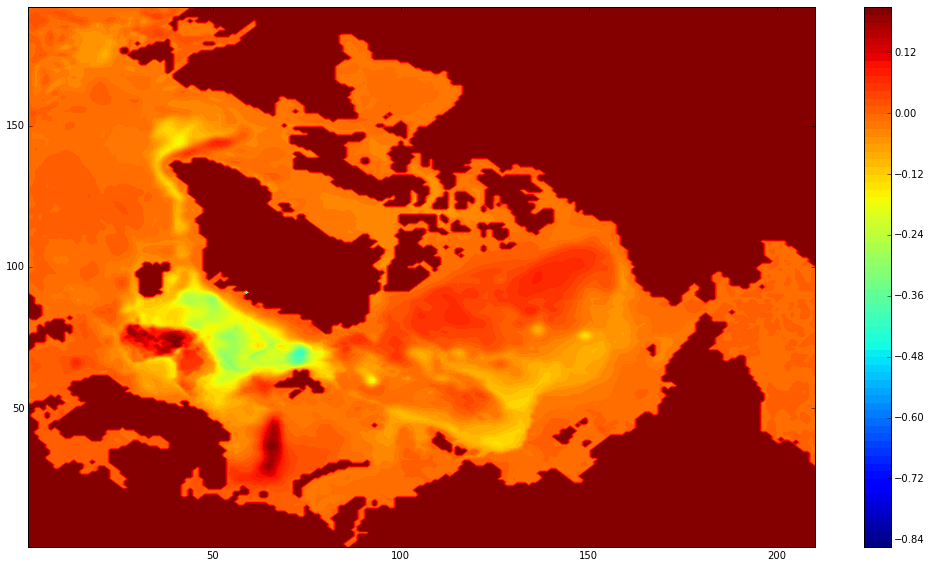

In [11]:
# Overall difference between non restoring run and restoring run
bathyfig = bathy1*(S_pert_tot - S_np_tot).max()
vimin = (S_pert_tot - S_np_tot ).min()
vimax = (S_pert_tot - S_np_tot ).max()
plt.contourf(X,Y,S_pert_tot - S_np_tot + bathyfig,100)
plt.colorbar()
plt.subplots_adjust(right=2.4,top=2)

In [94]:
def barotropic_dave(vel):
    if vel.shape[2] == 192:
        x="/scratch/general/am8e13/results36km"
    elif vel.shape[2] == 384 :
        x="/scratch/general/am8e13/results18km"
        
    os.chdir(x) 
    file2read = netcdf.NetCDFFile("grid.nc",'r')
    hfacw = file2read.variables['HFacW']
    hfacw = hfacw[:]*1
    dyg = file2read.variables['dyG']
    dyg = dyg[:]*1
    drf = file2read.variables['drF']
    drf = drf[:]*1   
    dydz = np.zeros_like(hfacw)
    psi = np.zeros_like(vel[:,1,:,:])
    # Volume calculation
    for i in range(dyg.shape[0]):
        for j in range(dyg.shape[1]):
            for k in range(drf.shape[0]):
                dydz[k,i,j] = drf[k]*dyg[i,j]*hfacw[k,i,j]
                
    for temp in range(vel.shape[0]):
        utemp = np.zeros_like(hfacw)
        for i in range(dyg.shape[0]):
            for j in range(dyg.shape[1]):
                for k in range(drf.shape[0]):
                    utemp[k,i,j] = dydz[k,i,j]* vel[temp,k,i,j]
    
        # vertical integration
        utemp = np.sum( utemp, 0 );
        # Integration horizontally
        psi[temp,:,:] = np.cumsum( -utemp, axis = 0 );
    
    return psi/10**6
    
psi = barotropic_dave(U)

In [95]:
times = [181,192,204,216,228,234]
timesste = np.zeros(6)
for i in range(6):
    timesste[i] = (days[times[i]]-days[0])/t
    
    
S_pert_top[:,bathy1 == 1] = np.nan
S_np_top_ave[bathy1 == 1] = np.nan
ETA[:,bathy1 == 1] = np.nan
ETA_np_tot[bathy1 == 1] = np.nan
Temp[:,bathy == 1] = np.nan
S[:,bathy == 1] = np.nan
S_np[:,bathy == 1 ] = np.nan
psi_nan=psi[:,0:192,0:210]
psi_nan[:,bathy1 == 1] = np.nan

In [97]:
#times = [181,192,204,216,228,234]
times = [181,186,192,212,233,263]

#times = [180,185,190,195,200,205,210,215,220,225,230,235]
timesste = np.zeros(6)

for i in range(6):
    timesste[i] = (days[times[i]]-days[181])/t
timesste = [10, 10.1, 10.5, 11.5, 12.5,14]
print timesste
    

[10, 10.1, 10.5, 11.5, 12.5, 14]


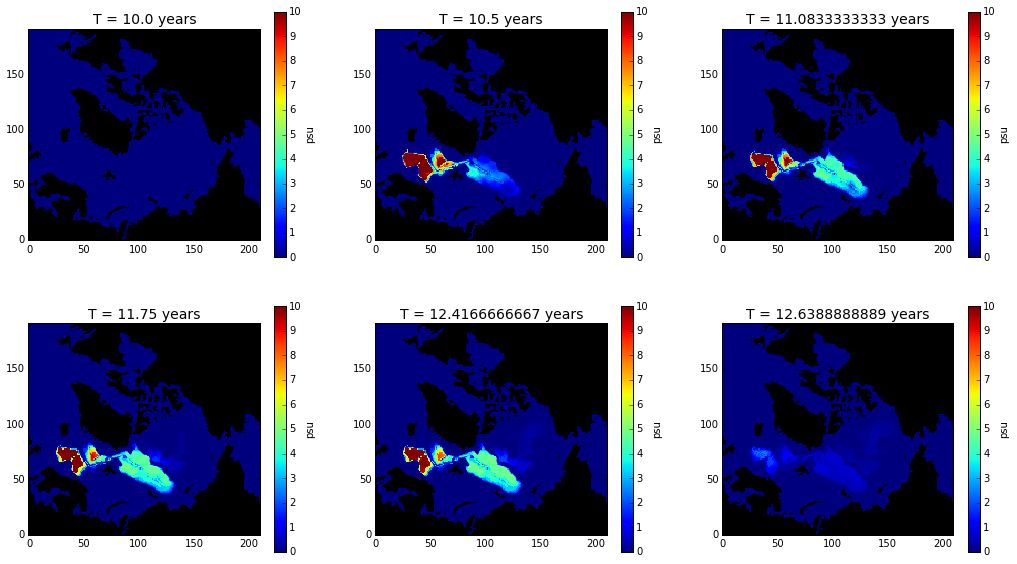

In [16]:
def plot_field(field,vimin,vimax,cmap,setbad,unity):
    # Salt contentration evolution
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax
    
    for ax in axes.flat:    

        
        ax.set_title("T = "+str(timesste[i]) +" years")
        masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(S_pert_top[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca , ax=ax, )
        cbar.ax.set_ylabel(unity)       
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
        i=i+1
        
    fig.subplots_adjust(right=2.4,top=2)

plot_field(S_pert_top - S_np_top_ave,0,10,matplotlib.cm.jet,'black','psu')    

In [ ]:
plot_field(S_pert_top - S_np_top_ave,0,10,matplotlib.cm.hot,'grey','psu') 

In [ ]:
plot_field(ETA - ETA_np_tot,-2,2,matplotlib.cm.coolwarm,'black','m')

In [ ]:
plot_field(np.mean(Temp[:,0:5,:,:],axis=1),0,20,matplotlib.cm.jet,'grey','C')

In [ ]:
plot_field(np.mean(S[:,0:5,:,:],axis=1),25,37,matplotlib.cm.winter,'black','psu')

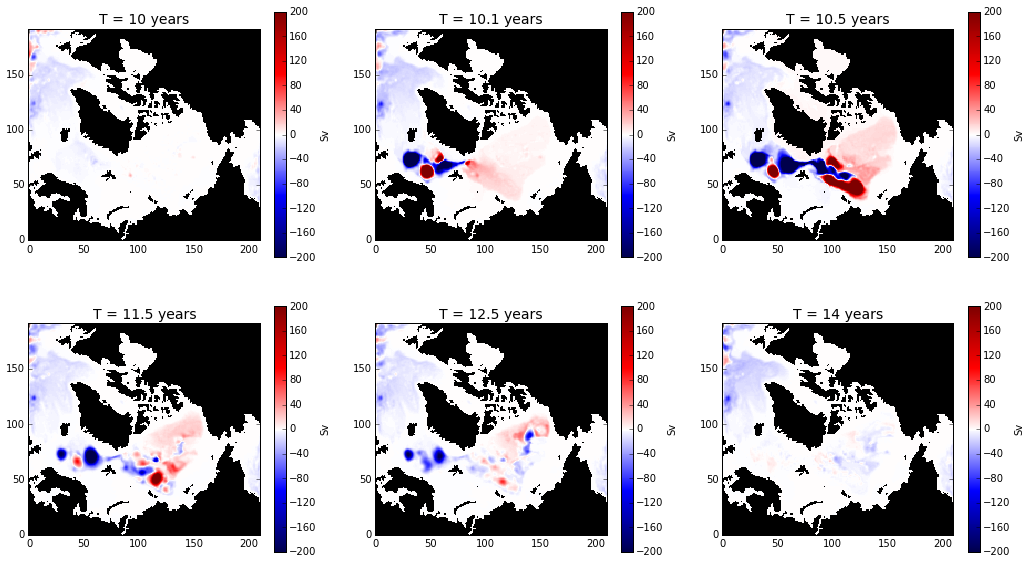

In [98]:
plot_field(psi_nan,-200,200,matplotlib.cm.seismic,'black','Sv')

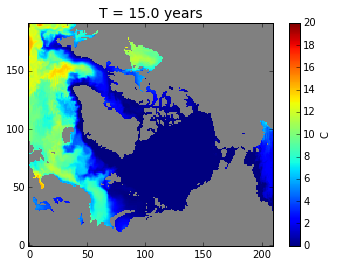

In [224]:
times = range(160,280,1)
def plot_field_gif(field,vimin,vimax,cmap,setbad,unity,title):
    # Salt contentration evolution
    
    #i=3
    vimin = vimin
    vimax = vimax
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for i in range(len(times)):
        
        ax.set_title("T = "+str(floor((days[times[i]]-days[0])/t*10)/10) +" years")
        masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(S_pert_top[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        if i == 0:
            cbar = fig.colorbar(ca , ax=ax, )
            cbar.ax.set_ylabel(unity)       
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
    
        
    #fig.subplots_adjust(right=2,top=1.6)
        if i < 10:
            zeros = '000'
        elif i < 100:
            zeros = '00'
        else:
            zeros = '0'
        sout = '/scratch/general/am8e13/gifs/'
        fig.savefig(sout+str(title)+zeros+str(i)+'.png',dpi=300)
        clf
    os.system("convert -delay 1 -dispose Background +page " + str(sout) \
          + "/*.png -loop 0 " + str(sout) + "/animation_"+title+".gif")
    os.system("rm "+str(sout)+"*png")
    sout = '/scratch/general/am8e13/gifs/'
plot_field_gif(np.mean(Temp[:,0:5,:,:],axis=1),0,20,matplotlib.cm.jet,'grey','C','surftemp')

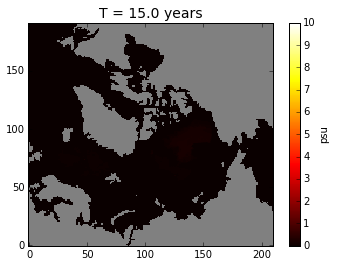

In [225]:
plot_field_gif(S_pert_top - S_np_top_ave,0,10,matplotlib.cm.hot,'grey','psu','salt_anom') 

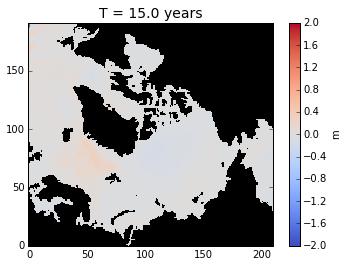

In [226]:
plot_field_gif(ETA - ETA_np_tot,-2,2,matplotlib.cm.coolwarm,'black','m','ETA')

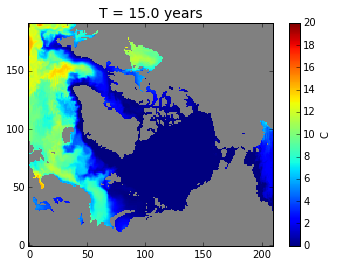

In [227]:
plot_field_gif(np.mean(Temp[:,0:5,:,:],axis=1),0,20,matplotlib.cm.jet,'grey','C','tempsurf')

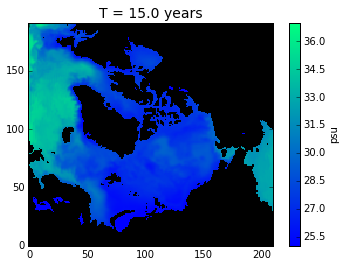

In [228]:
plot_field_gif(np.mean(S[:,0:5,:,:],axis=1),25,37,matplotlib.cm.winter,'black','psu','saltsurf')

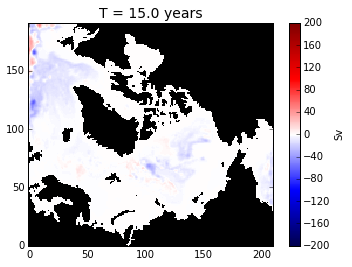

In [229]:
plot_field_gif(psi_nan,-200,200,matplotlib.cm.seismic,'black','Sv','barostream')

In [25]:
x="/scratch/general/am8e13/results2_multitrac36km/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("ptracers.nc",'r')
#storeggaBig=file2read.variables['storeggaBig']
#storeggaBig=storeggaBig[:]*1
daysStoregga=file2read.variables['T']
daysStoregga=daysStoregga[:]*1

In [231]:
#times = [181,192,204,216,228,234]
times = [0,25,50,75,150,250]

#times = [180,185,190,195,200,205,210,215,220,225,230,235]
timesste = np.zeros(6)

for i in range(6):
    timesste[i] = (daysStoregga[times[i]]-daysStoregga[0])//(360*60*60*24)
#timesste = [0, 10, 10.5, 11.5, 12.5,14]
print timesste

[  0.   2.   5.   8.  16.  27.]


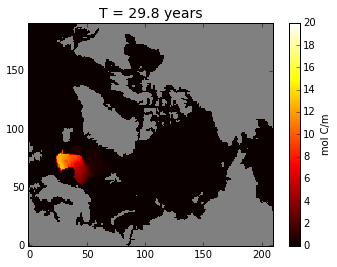

In [238]:
times = range(0,270,1)
def plot_field_gif(field,vimin,vimax,cmap,setbad,unity,title):
    # Salt contentration evolution
    
    #i=3
    vimin = vimin
    vimax = vimax
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for i in range(len(times)):
        
        ax.set_title("T = "+str(floor((daysStoregga[times[i]]-daysStoregga[0])/t*10)/10) +" years")
        masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(S_pert_top[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        if i == 0:
            cbar = fig.colorbar(ca , ax=ax, )
            cbar.ax.set_ylabel(unity)       
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
    
        
    #fig.subplots_adjust(right=2,top=1.6)
        if i < 10:
            zeros = '000'
        elif i < 100:
            zeros = '00'
        else:
            zeros = '0'
        sout = '/scratch/general/am8e13/gifs/'
        fig.savefig(sout+str(title)+zeros+str(i)+'.png',dpi=300)
        clf
    os.system("convert -delay 1 -dispose Background +page " + str(sout) \
          + "/*.png -loop 0 " + str(sout) + "/animation_"+title+".gif")
    os.system("rm "+str(sout)+"*png")
    sout = '/scratch/general/am8e13/gifs/'
plot_field_gif(np.mean(storeggaBig[:,30:40,:,:],axis=1),0,20,matplotlib.cm.hot,'grey','mol C/m ','ptrac')

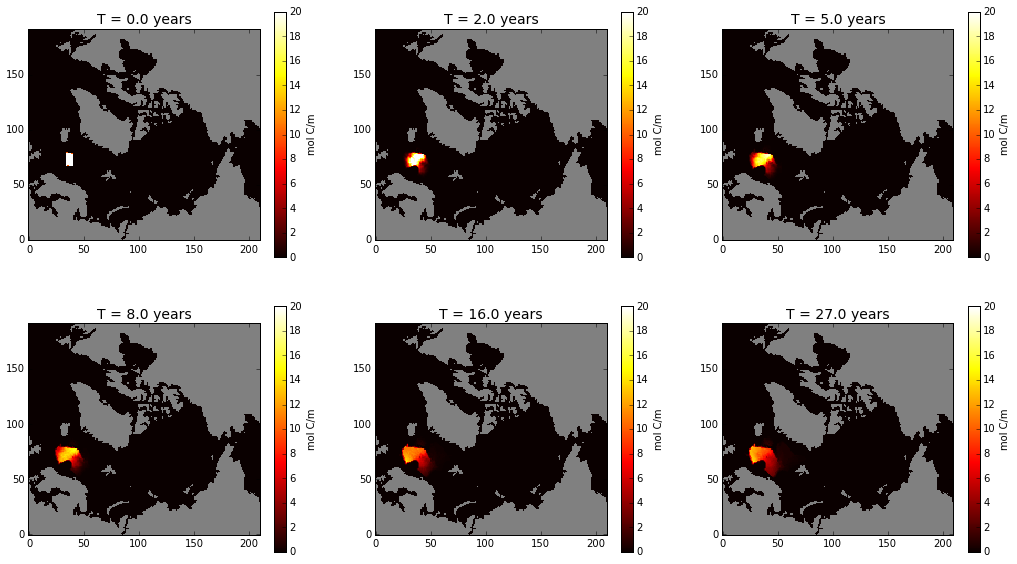

In [236]:
plot_field(np.mean(storeggaBig[:,30:40,:,:],axis=1),0,20,matplotlib.cm.hot,'grey','mol C/m ')

()

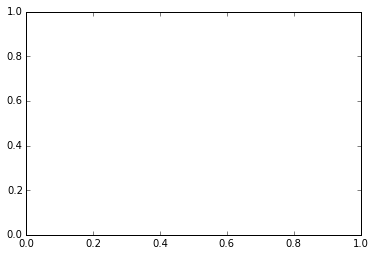

In [264]:
fig, ax = plt.subplots()
#plot(np.sum(np.sum(,axis=1),axis=1)
np.sum(S[]).shape
#title('Total Salt')

In [ ]:
def plot_field_1(field,vimin,vimax,cmap,setbad,unity):
    # Salt contentration evolution
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax
    for ax in axes.flat:
        ax.set_title("T = "+str(timesste[i]) +"years")
        masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(salt1))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        #cbar = fig.colorbar(ca , ax=ax, )
        #cbar.ax.set_ylabel(unity)
        i=i+1
    fig.subplots_adjust(right=2.4,top=1)



#salt = np.mean(S[:,:,65:75,:],axis=2) - np.mean(np.mean(S_np[:,:,65:75,:],axis=2),axis=0)
#salt1  = np.mean(np.mean(S_np[:,:,65:75,:],axis=2),axis=0)
#salt1.shape
plot_field_1(salt,0,10,matplotlib.cm.jet,'grey','psu')     

In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
i=0

#print levels
for ax in axes.flat:
    cs = ax.contourf(X,Y,bathy[i*7,:,:])
    fig.colorbar(cs, ax=ax)
    ax.set_title(""+str(Z[i*7]) +"years")
    i=i+1
#
fig.subplots_adjust(right=2.4,top=2)

In [ ]:
x="/scratch/general/am8e13/results2_Salt36km/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
S_pert=file2read.variables['S']
S_pert=S_pert[:]*1
days_pert=file2read.variables['T']
days_pert=days[:]*1

x="/scratch/general/am8e13/results2_blownupfull/"
os.chdir(x)                                                                                                                                                                                                                  
file2read = netcdf.NetCDFFile("state.nc",'r')
S_blown=file2read.variables['S']
S_blown=S_blown[:]*1
days_blown=file2read.variables['T']
days_blown=days_blown[:]*1

x="/scratch/general/am8e13/results2_multitrac36km/"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_np=file2read.variables['S']
S_np=S_np[:]*1
days_np=file2read.variables['T']
days_np=days_np[:]*1

x="/scratch/general/am8e13/results_restore"
os.chdir(x)
file2read = netcdf.NetCDFFile("state.nc",'r')
S_restore=file2read.variables['S']
S_restore=S_restore[:]*1
days_restore=file2read.variables['T']
days_restore=days_restore[:]*1

dZ = np.zeros(len(Z)-1)
dZ[:] = Z[0:len(Z)-1] - Z[1:len(Z)]
#plot(dZ)



In [ ]:
S_pert_quant = np.sum(S_pert, axis=2)
S_pert_quant = np.sum(S_pert_quant, axis=2)
S_pert_quant_a = np.dot(S_pert_quant[:,0:49],dZ)
# S_pert_quant_a total salt volume in m3

S_blown_quant = np.sum(S_blown, axis=2)
S_blown_quant = np.sum(S_blown_quant, axis=2)
S_blown_quant_a = np.dot(S_blown_quant[:,0:49],dZ)

S_np_quant = np.sum(S_np, axis=2)
S_np_quant = np.sum(S_np_quant, axis=2)
S_np_quant_a = np.dot(S_np_quant[:,0:49],dZ)

S_restore_quant = np.sum(S_restore, axis=2)
S_restore_quant = np.sum(S_restore_quant, axis=2)
S_restore_quant_a = np.dot(S_restore_quant[:,0:49],dZ)

S_input = np.array(S_np)
S_input[:,36:44,67:83,34:42,]=100
            
S_input_quant = np.sum(S_input, axis=2)
S_input_quant = np.sum(S_input_quant, axis=2)
S_input_quant_a = np.dot(S_input_quant[:,0:49],dZ)

#plt.plot(S_pert_quant_a,'r--',S_input_quant_a,'b',S_np_quant_a,'g',S_blown_quant_a,'b--',S_restore_quant_a,'g--')
quant, = plt.plot((days_pert[0:100] - days_pert[0])/t,S_input_quant_a[0:100],'violet',label = 'Target volume')
pert, = plt.plot((days_pert[0:100] - days_pert[0])/t,S_pert_quant_a[0:100],'r',label = 'tau_S = 1day, S_max = 50psu')
nprun, = plt.plot((days_np[0:100] - days_np[0])/t,S_np_quant_a[0:100],'g',label = 'No restoring')
blown, = plt.plot((days_blown[0:60] - days_blown[0])/t,S_blown_quant_a[0:60],'b',label = 'tau_S = 500days, S_max = 100psu')
restore, = plt.plot((days_restore[180:420]-days_restore[180])/t,S_restore_quant_a[180:420],'black',label = 'tau_S = 25 days, S_max = 100psu')
#set_title("Salt volume evolution")
plt.xlabel('Years after perturbation start')
plt.ylabel('Salt Volume')
plt.legend(handles=[quant,pert,nprun,blown,restore])#,['Stable Pert','Target volume','Non pert run','Almost stable pert','Unstable run'])
plt.subplots_adjust(right=1.4,top=1.4)

In [279]:
dZ = np.zeros(len(Z)-1)
dZ[:] = Z[0:len(Z)-1] - Z[1:len(Z)]
#plot(dZ)

S_pert_quant = np.nansum(S, axis=2)
S_pert_quant = np.nansum(S_pert_quant, axis=2)
S_pert_quant_a = np.dot(S_pert_quant[:,0:49],dZ)

fig, ax = subplots()
ax.plot((days[0:400]-days[0])/t,S_pert_quant_a[0:400],'black')


NameError: name 'subplots' is not defined

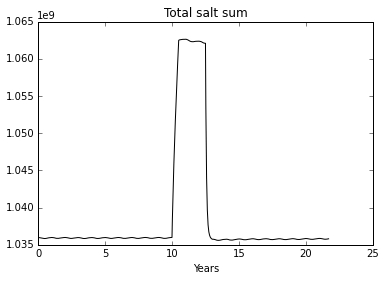

In [282]:
fig, ax = plt.subplots()
ax.plot((days[0:400]-days[0])/t,S_pert_quant_a[0:400],'black')
ax.set_xlabel('Years')
ax.set_title('Total salt sum')

In [58]:
x="/scratch/general/am8e13/results_restore"
os.chdir(x)

theta_mean_tot =[]
theta_max_tot =[]
theta_min_tot =[]

eta_mean_tot =[]
eta_max_tot =[]
eta_min_tot =[]

salt_mean_tot =[]
salt_max_tot =[]
salt_min_tot =[]

sss_mean_tot =[]
sss_max_tot =[]
sss_min_tot =[]

sst_mean_tot =[]
sst_max_tot =[]
sst_min_tot =[]

vvel_mean_tot =[]
vvel_max_tot =[]
vvel_min_tot =[]

uvel_mean_tot =[]
uvel_max_tot =[]
uvel_min_tot =[]

ke_mean_tot =[]
ke_max_tot =[]
ke_vol_tot =[]

seaice_area_max_tot = []
seaice_area_min_tot = []
seaice_area_mean_tot = []

seaice_heff_max_tot = []
seaice_heff_min_tot = []
seaice_heff_mean_tot = []

time_seconds_tot = []

theta_lv_mean_tot =np.zeros([1,1,50])
theta_lv_max_tot =np.zeros([1,1,50])
theta_lv_min_tot =np.zeros([1,1,50])

salt_lv_mean_tot =np.zeros([1,1,50])
salt_lv_max_tot =np.zeros([1,1,50])
salt_lv_min_tot =np.zeros([1,1,50])

vvel_lv_mean_tot =np.zeros([1,1,50])
vvel_lv_max_tot =np.zeros([1,1,50])
vvel_lv_min_tot =np.zeros([1,1,50])

uvel_lv_mean_tot =np.zeros([1,1,50])
uvel_lv_max_tot =np.zeros([1,1,50])
uvel_lv_min_tot =np.zeros([1,1,50])

ke_lv_mean_tot =np.zeros([1,1,50])
ke_lv_max_tot =np.zeros([1,1,50])

time_lv_tot = []

#009059040.t001.nc      monitor_ptracer.0010069920.t001.nc 
#dynDiag.nc                          monitor_exf.0009564480

for iter in [10069920,10588320,10614240,10717920,10743840,11262240]:
    if iter > 10000000:
        file2read1 = netcdf.NetCDFFile("monitor.00"+str(iter)+".t001.nc",'r')
        file2read2 = netcdf.NetCDFFile("dynStDiag.00"+str(iter)+".t001.nc",'r')
        file2read3 = netcdf.NetCDFFile("monitor_seaice.00"+str(iter)+".t001.nc",'r')
    elif iter < 10000000:
        file2read1 = netcdf.NetCDFFile("monitor.000"+str(iter)+".t001.nc",'r')
        file2read2 = netcdf.NetCDFFile("dynStDiag.000"+str(iter)+".t001.nc",'r')
        file2read3 = netcdf.NetCDFFile("monitor_seaice.000"+str(iter)+".t001.nc",'r')
        
    time_seconds = file2read1.variables['time_secondsf']
    time_seconds=time_seconds[:]*1
    
    theta_mean=file2read1.variables['dynstat_theta_mean']
    theta_mean=theta_mean[:]*1    
    theta_max=file2read1.variables['dynstat_theta_max']
    theta_max=theta_max[:]*1
    theta_min=file2read1.variables['dynstat_theta_min']
    theta_min=theta_min[:]*1
    
    salt_mean=file2read1.variables['dynstat_salt_mean']
    salt_mean=salt_mean[:]*1
    salt_max=file2read1.variables['dynstat_salt_max']
    salt_max=salt_max[:]*1
    salt_min=file2read1.variables['dynstat_salt_min']
    salt_min=salt_min[:]*1
    
    sst_mean=file2read1.variables['dynstat_sst_mean']
    sst_mean=sst_mean[:]*1
    sst_max=file2read1.variables['dynstat_sst_max']
    sst_max=sst_max[:]*1
    sst_min=file2read1.variables['dynstat_sst_max']
    sst_min=sst_min[:]*1
    
    sss_mean=file2read1.variables['dynstat_sss_mean']
    sss_mean=sss_mean[:]*1
    sss_mim=file2read1.variables['dynstat_sss_min']
    sss_min=sss_mean[:]*1
    sss_max=file2read1.variables['dynstat_sss_max']
    sss_max=sss_max[:]*1
    
    eta_mean=file2read1.variables['dynstat_eta_mean']
    eta_mean=eta_mean[:]*1
    eta_min=file2read1.variables['dynstat_eta_min']
    eta_min=eta_min[:]*1
    eta_max=file2read1.variables['dynstat_eta_max']
    eta_max=eta_max[:]*1
    
    uvel_mean=file2read1.variables['dynstat_uvel_mean']
    uvel_mean=uvel_mean[:]*1
    uvel_max=file2read1.variables['dynstat_uvel_max']
    uvel_max=uvel_max[:]*1
    uvel_min=file2read1.variables['dynstat_uvel_min']
    uvel_min=uvel_min[:]*1
    
    vvel_mean=file2read1.variables['dynstat_vvel_mean']
    vvel_mean=vvel_mean[:]*1
    vvel_max=file2read1.variables['dynstat_vvel_max']
    vvel_max=vvel_max[:]*1
    vvel_min=file2read1.variables['dynstat_vvel_min']
    vvel_min=vvel_min[:]*1
    
    ke_mean=file2read1.variables['ke_mean']
    ke_mean=ke_mean[:]*1
    ke_max=file2read1.variables['ke_max']
    ke_max=ke_max[:]*1
    ke_vol=file2read1.variables['ke_vol']
    ke_vol=ke_vol[:]*1
    
    # Sea ice stat
    seaice_area_max = file2read3.variables['seaice_area_max']
    seaice_area_max = seaice_area_max[:]*1
    seaice_area_min = file2read3.variables['seaice_area_min']
    seaice_area_min = seaice_area_min[:]*1
    seaice_area_mean = file2read3.variables['seaice_area_mean']
    seaice_area_mean = seaice_area_mean[:]*1

    seaice_heff_max = file2read3.variables['seaice_heff_max']
    seaice_heff_max = seaice_heff_max[:]*1
    seaice_heff_min = file2read3.variables['seaice_heff_min']
    seaice_heff_min = seaice_heff_min[:]*1
    seaice_heff_mean = file2read3.variables['seaice_heff_mean']
    seaice_heff_mean = seaice_heff_mean[:]*1
    
    # Dyn Stat
    time_lv = file2read2.variables['T']
    time_lv=time_lv[:]*1
    
    theta_mean_lv=file2read2.variables['THETA_lv_ave']
    theta_mean_lv=theta_mean_lv[:]*1    
    theta_max_lv=file2read2.variables['THETA_lv_max']
    theta_max_lv=theta_max_lv[:]*1
    theta_min_lv=file2read2.variables['THETA_lv_min']
    theta_min_lv=theta_min_lv[:]*1
    
    salt_mean_lv=file2read2.variables['SALT_lv_ave']
    salt_mean_lv=salt_mean_lv[:]*1
    salt_max_lv=file2read2.variables['SALT_lv_max']
    salt_max_lv=salt_max_lv[:]*1
    salt_min_lv=file2read2.variables['SALT_lv_min']
    salt_min_lv=salt_min_lv[:]*1
    
    uvel_mean_lv=file2read2.variables['UVEL_lv_ave']
    uvel_mean_lv=uvel_mean_lv[:]*1
    uvel_max_lv=file2read2.variables['UVEL_lv_max']
    uvel_max_lv=uvel_max_lv[:]*1
    uvel_min_lv=file2read2.variables['UVEL_lv_min']
    uvel_min_lv=uvel_min_lv[:]*1
    
    vvel_mean_lv=file2read2.variables['VVEL_lv_ave']
    vvel_mean_lv=vvel_mean_lv[:]*1
    vvel_max_lv=file2read2.variables['VVEL_lv_max']
    vvel_max_lv=vvel_max_lv[:]*1
    vvel_min_lv=file2read2.variables['VVEL_lv_min']
    vvel_min_lv=vvel_min_lv[:]*1

    ke_mean_lv=file2read2.variables['momKE_lv_ave']
    ke_mean_lv=ke_mean_lv[:]*1
    ke_max_lv=file2read2.variables['momKE_lv_max']
    ke_max_lv=ke_max_lv[:]*1
    

    time_seconds_tot =np.concatenate([time_seconds_tot , time_seconds])
    
    theta_mean_tot =np.concatenate([theta_mean_tot , theta_mean])
    theta_min_tot = np.concatenate([theta_min_tot , theta_min])
    theta_max_tot =np.concatenate([theta_max_tot , theta_max])
    
    salt_mean_tot =np.concatenate([salt_mean_tot , salt_mean])
    salt_min_tot =np.concatenate([salt_min_tot , salt_min])
    salt_max_tot =np.concatenate([salt_max_tot , salt_max])

    sst_mean_tot =np.concatenate([sst_mean_tot , sst_mean])
    sst_min_tot =np.concatenate([sst_min_tot , sst_min])
    sst_max_tot =np.concatenate([sst_max_tot , sst_max])
    
    sss_mean_tot =np.concatenate([sss_mean_tot , sss_mean])
    sss_min_tot =np.concatenate([sss_min_tot , sss_min])
    sss_max_tot =np.concatenate([sss_max_tot , sss_max])
    
    vvel_mean_tot =np.concatenate([vvel_mean_tot , vvel_mean])
    vvel_min_tot =np.concatenate([vvel_min_tot , vvel_min])
    vvel_max_tot =np.concatenate([vvel_max_tot , vvel_max])
    
    uvel_mean_tot =np.concatenate([uvel_mean_tot , uvel_mean])
    uvel_min_tot =np.concatenate([uvel_min_tot , uvel_min])
    uvel_max_tot =np.concatenate([uvel_max_tot , uvel_max])
    
    eta_mean_tot =np.concatenate([eta_mean_tot , eta_mean])
    eta_min_tot = np.concatenate([eta_min_tot , eta_min])
    eta_max_tot =np.concatenate([eta_max_tot , eta_max])
    
    ke_mean_tot =np.concatenate([ke_mean_tot , ke_mean])
    ke_vol_tot = np.concatenate([ke_vol_tot , ke_vol])
    ke_max_tot =np.concatenate([ke_max_tot , ke_max])
    
    seaice_area_max_tot =np.concatenate([seaice_area_max_tot , seaice_area_max])
    seaice_area_min_tot = np.concatenate([seaice_area_min_tot , seaice_area_min])
    seaice_area_mean_tot =np.concatenate([seaice_area_mean_tot , seaice_area_mean])
    
    seaice_heff_max_tot =np.concatenate([seaice_heff_max_tot , seaice_heff_max])
    seaice_heff_min_tot = np.concatenate([seaice_heff_min_tot , seaice_heff_min])
    seaice_heff_mean_tot =np.concatenate([seaice_heff_mean_tot , seaice_heff_mean])
    
    theta_lv_mean_tot =np.concatenate([theta_lv_mean_tot , theta_mean_lv],axis=0)
    theta_lv_max_tot =np.concatenate([theta_lv_max_tot , theta_max_lv])
    theta_lv_min_tot =np.concatenate([theta_lv_min_tot , theta_min_lv])
    
    salt_lv_mean_tot =np.concatenate([salt_lv_mean_tot , salt_mean_lv])
    salt_lv_max_tot =np.concatenate([salt_lv_max_tot , salt_max_lv])
    salt_lv_min_tot =np.concatenate([salt_lv_min_tot , salt_min_lv])
    
    vvel_lv_mean_tot =np.concatenate([vvel_lv_mean_tot , vvel_mean_lv])
    vvel_lv_max_tot =np.concatenate([vvel_lv_max_tot , vvel_max_lv])
    vvel_lv_min_tot =np.concatenate([vvel_lv_min_tot , vvel_min_lv])
    
    uvel_lv_mean_tot =np.concatenate([uvel_lv_mean_tot , uvel_mean_lv])
    uvel_lv_max_tot =np.concatenate([uvel_lv_max_tot , uvel_max_lv])
    uvel_lv_min_tot =np.concatenate([uvel_lv_min_tot , uvel_min_lv])
    
    ke_lv_mean_tot =np.concatenate([ke_lv_mean_tot , ke_mean_lv])
    ke_lv_max_tot =np.concatenate([ke_lv_max_tot , ke_max_lv])
    
    time_lv_tot = np.concatenate([time_lv_tot , time_lv])
    
theta_lv_mean_tot = theta_lv_mean_tot[1:,:,:].squeeze(axis=1)
theta_lv_max_tot = theta_lv_max_tot[1:,:,:].squeeze(axis=1)
theta_lv_min_tot = theta_lv_min_tot[1:,:,:].squeeze(axis=1)
salt_lv_mean_tot = salt_lv_mean_tot[1:,:,:].squeeze(axis=1)
salt_lv_max_tot = salt_lv_max_tot[1:,:,:].squeeze(axis=1)
salt_lv_min_tot = salt_lv_min_tot[1:,:,:].squeeze(axis=1)
vvel_lv_mean_tot = vvel_lv_mean_tot[1:,:,:].squeeze(axis=1)
vvel_lv_max_tot = vvel_lv_max_tot[1:,:,:].squeeze(axis=1)
vvel_lv_min_tot = vvel_lv_min_tot[1:,:,:].squeeze(axis=1)
uvel_lv_mean_tot = uvel_lv_mean_tot[1:,:,:].squeeze(axis=1)
uvel_lv_max_tot = uvel_lv_max_tot[1:,:,:].squeeze(axis=1)
uvel_lv_min_tot = uvel_lv_min_tot[1:,:,:].squeeze(axis=1)
ke_lv_mean_tot = ke_lv_mean_tot[1:,:,:].squeeze(axis=1)
ke_lv_max_tot = ke_lv_max_tot[1:,:,:].squeeze(axis=1)

#averages
ave_theta_mean = np.zeros(32)
ave_sss_mean = np.zeros(32)
ave_sst_mean = np.zeros(32)
for i in range(32):
    ave_theta_mean[i] = np.mean(theta_mean_tot[i*36+0:i*36+36])
    ave_sss_mean[i] = np.mean(sss_mean_tot[i*36+0:i*36+36])
    ave_sst_mean[i] = np.mean(sst_mean_tot[i*36+0:i*36+36])

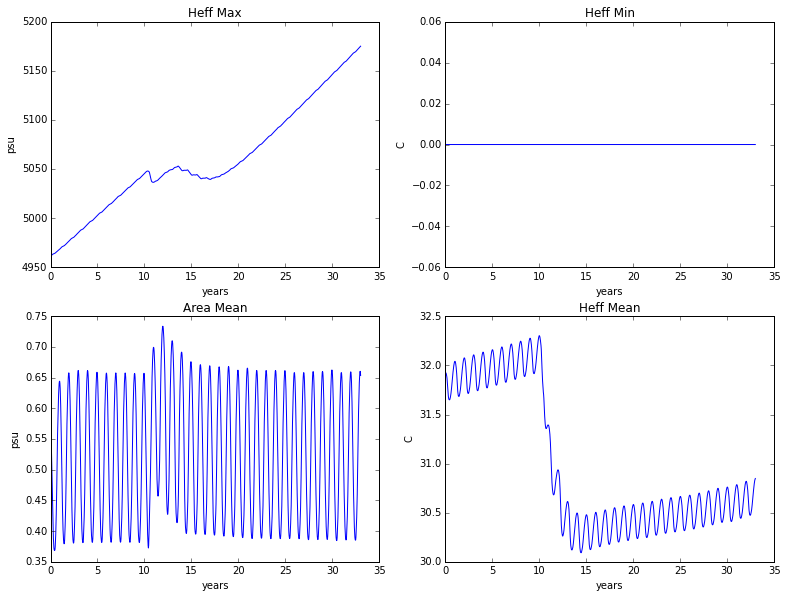

In [65]:
# seaice
fig, axes = plt.subplots(nrows=2, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0,0].plot(time,seaice_heff_max_tot)
axes[0,0].set_title('Heff Max')
axes[0,0].set_ylabel('psu')
axes[0,0].set_xlabel('years')
     
axes[0,1].plot(time,seaice_heff_min_tot)
#axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_xlabel('years')
axes[0,1].set_title('Heff Min')

axes[1,0].plot(time,seaice_area_mean_tot)
#axes[1,0].plot(ave_sss_mean)
#axes[3].plot(sss_max_tot)
#axes[3].plot(sss_min_tot)
axes[1,0].set_xlabel('years')
axes[1,0].set_title('Area Mean')
axes[1,0].set_ylabel('psu')

axes[1,1].plot(time,seaice_heff_mean_tot)
#axes[1,1].plot(ave_sst_mean)
#axes[2].plot(sst_max_tot)
#axes[2].plot(sst_min_tot)
axes[1,1].set_xlabel('years')
axes[1,1].set_title('Heff Mean')
axes[1,1].set_ylabel('C')

fig.subplots_adjust(right=1.8,top=2)

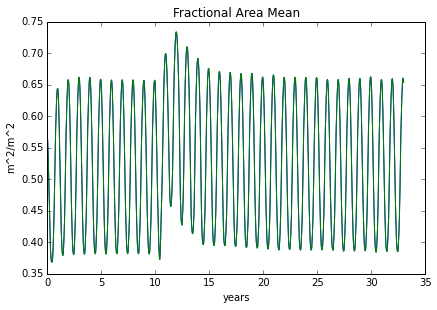

In [174]:
# seaice
fig, axes = plt.subplots(nrows=1, ncols=1)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes.plot(time,seaice_area_mean_tot)
axes.set_xlabel('years')
axes.set_title('Fractional Area Mean')
axes.set_ylabel('m^2/m^2')

#fig.subplots_adjust(right=1.,top=1)
#fig.hold
#fig, axes = plt.subplots(nrows=1, ncols=1)
#time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)
axes.clear
axes.plot(time,seaice_area_mean_tot)
axes.set_xlabel('years')
axes.set_title('Fractional Area Mean')
axes.set_ylabel('m^2/m^2')

fig.subplots_adjust(right=1.,top=1)


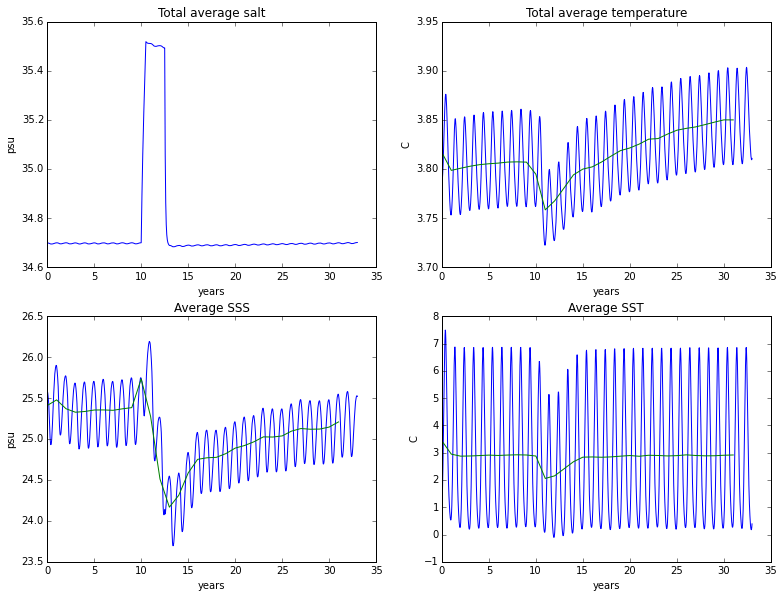

In [92]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0,0].plot(time,salt_mean_tot)
axes[0,0].set_title('Salt average')
axes[0,0].set_title('Total average salt')
axes[0,0].set_ylabel('psu')
axes[0,0].set_xlabel('years')
     
axes[0,1].plot(time,theta_mean_tot)
axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_xlabel('years')
axes[0,1].set_title('Total average temperature')

axes[1,0].plot(time,sss_mean_tot)
axes[1,0].plot(ave_sss_mean)
#axes[3].plot(sss_max_tot)
#axes[3].plot(sss_min_tot)
axes[1,0].set_xlabel('years')
axes[1,0].set_title('Average SSS')
axes[1,0].set_ylabel('psu')

axes[1,1].plot(time,sst_mean_tot)
axes[1,1].plot(ave_sst_mean)
#axes[2].plot(sst_max_tot)
#axes[2].plot(sst_min_tot)
axes[1,1].set_xlabel('years')
axes[1,1].set_title('Average SST')
axes[1,1].set_ylabel('C')

fig.subplots_adjust(right=1.8,top=2)

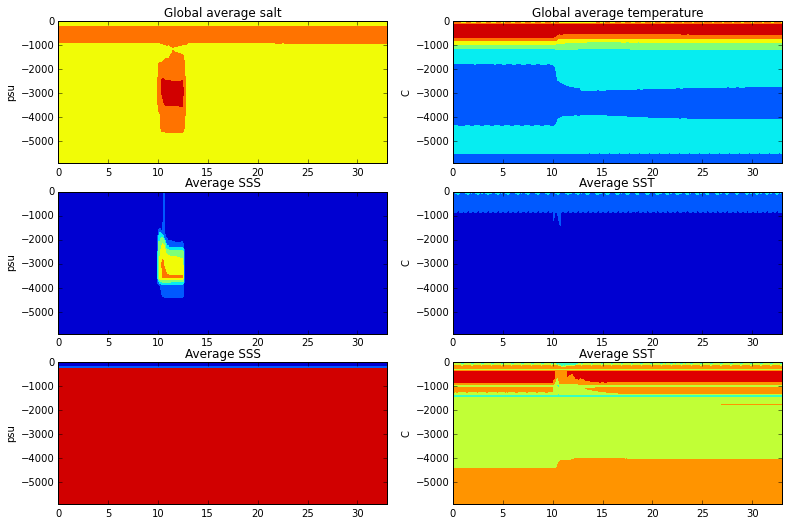

In [283]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=3, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)
time_lv = (time_lv_tot- time_lv_tot[0])/(360*60*60*24)

axes[0,0].contourf(time_lv,Z,salt_lv_mean_tot.T,vimin=30,vimax=36)
axes[0,0].set_title('Salt average')
axes[0,0].set_title('Global average salt')
axes[0,0].set_ylabel('psu')
     
axes[0,1].contourf(time_lv,Z,theta_lv_mean_tot.T)
#axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_title('Global average temperature')

axes[1,0].contourf(time_lv,Z,salt_lv_max_tot.T)
axes[1,0].set_title('Average SSS')
axes[1,0].set_ylabel('psu')

axes[1,1].contourf(time_lv,Z,theta_lv_max_tot.T)
axes[1,1].set_title('Average SST')
axes[1,1].set_ylabel('C')

axes[2,0].contourf(time_lv,Z,salt_lv_min_tot.T)
axes[2,0].set_title('Average SSS')
axes[2,0].set_ylabel('psu')

axes[2,1].contourf(time_lv,Z,theta_lv_min_tot.T)
axes[2,1].set_title('Average SST')
axes[2,1].set_ylabel('C')

fig.subplots_adjust(right=1.8,top=1.8)

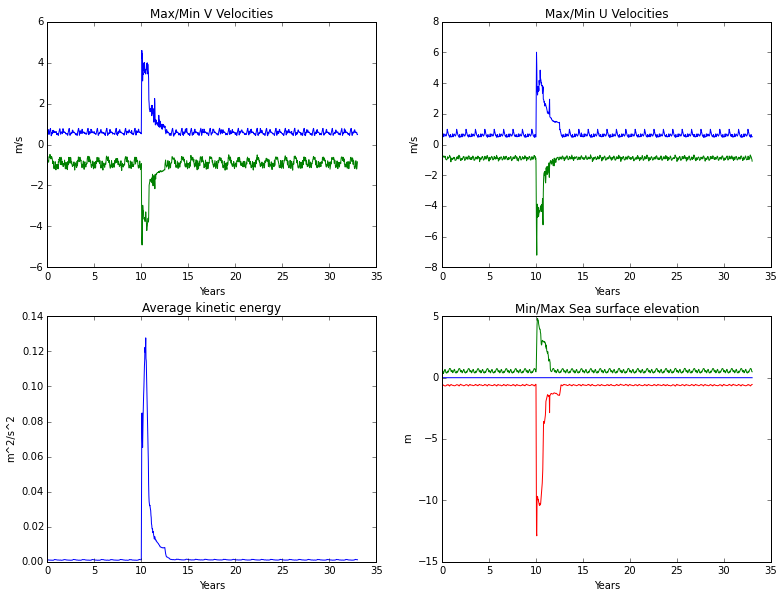

In [284]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=2)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

#axes[0].plot(vvel_mean_tot,label = 'V mean')
axes[0,0].plot(time,vvel_max_tot,label = 'V max')
axes[0,0].plot(time,vvel_min_tot,label = 'V min')
axes[0,0].set_title('Max/Min V Velocities ')
axes[0,0].set_xlabel('Years')
#axes[0,0].set_xlabel('years')
axes[0,0].set_ylabel('m/s')

#axes[0].plot(uvel_mean_tot)
axes[0,1].plot(time,uvel_max_tot,label = 'U max')
axes[0,1].plot(time,uvel_min_tot,label = 'U min')
axes[0,1].set_title('Max/Min U Velocities ')
axes[0,1].set_xlabel('Years')
axes[0,1].set_ylabel('m/s')

axes[1,0].plot(time,ke_mean_tot)
#axes[1,0].plot(time,ke_max_tot)
#axes[1,0].plot(ke_vol_tot)
axes[1,0].set_title('Average kinetic energy')
axes[1,0].set_ylabel('m^2/s^2')
axes[1,0].set_xlabel('Years')

axes[1,1].plot(time,eta_mean_tot)
axes[1,1].plot(time,eta_max_tot)
axes[1,1].plot(time,eta_min_tot)
axes[1,1].set_title('Min/Max Sea surface elevation ')
axes[1,1].set_ylabel('m')
axes[1,1].set_xlabel('Years')

fig.subplots_adjust(right=1.8,top=2)

In [286]:
psi_mean = np.nanmean(psi,axis = 1)
psi_mean = np.nanmean(psi_mean,axis = 1)
psi_max = np.nanmax(psi,axis=1)
psi_max = np.nanmax(psi_max,axis=1)
psi_min = np.nanmin(psi,axis=1)
psi_min = np.nanmin(psi_min,axis=1)

psi_mean_year = np.zeros(32)
for i in range(32):
    psi_mean_year[i] = np.mean(psi_mean[i*10+0:i*10+10])


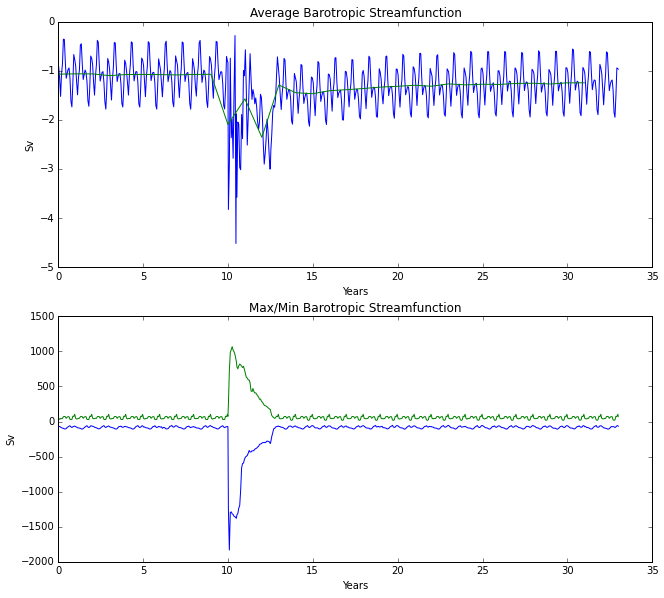

In [288]:
fig, axes = plt.subplots(nrows=2, ncols=1)

psi_mean = np.nanmean(psi,axis = 1)
psi_mean = np.nanmean(psi_mean,axis = 1)
psi_max = np.nanmax(psi,axis=1)
psi_max = np.nanmax(psi_max,axis=1)
psi_min = np.nanmin(psi,axis=1)
psi_min = np.nanmin(psi_min,axis=1)

psi_mean_year = np.zeros(32)
for i in range(32):
    psi_mean_year[i] = np.mean(psi_mean[i*18+0:i*18+18])
    
axes[0].plot((days-days[0])/t,psi_mean)
axes[0].plot(psi_mean_year)
axes[1].plot((days-days[0])/t,psi_min)
axes[1].plot((days-days[0])/t,psi_max)
axes[0].set_ylabel('Sv')
axes[1].set_ylabel('Sv')
axes[0].set_xlabel('Years')
axes[1].set_xlabel('Years')
axes[0].set_title('Average Barotropic Streamfunction')
axes[1].set_title('Max/Min Barotropic Streamfunction')


fig.subplots_adjust(right=1.5,top=2)

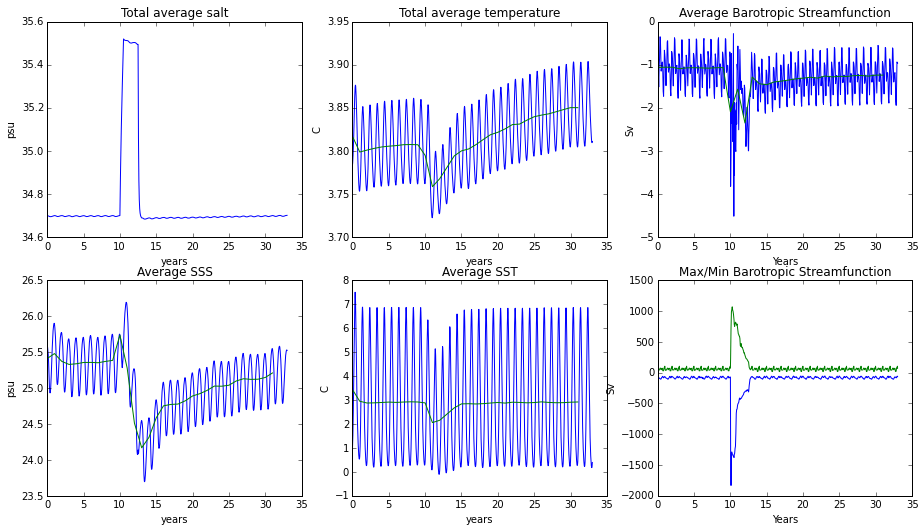

In [300]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=2, ncols=3)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0,0].plot(time,salt_mean_tot)
axes[0,0].set_title('Salt average')
axes[0,0].set_title('Total average salt')
axes[0,0].set_ylabel('psu')
axes[0,0].set_xlabel('years')
     
axes[0,1].plot(time,theta_mean_tot)
axes[0,1].plot(ave_theta_mean)
axes[0,1].set_ylabel('C')
axes[0,1].set_xlabel('years')
axes[0,1].set_title('Total average temperature')

axes[1,0].plot(time,sss_mean_tot)
axes[1,0].plot(ave_sss_mean)
#axes[3].plot(sss_max_tot)
#axes[3].plot(sss_min_tot)
axes[1,0].set_xlabel('years')
axes[1,0].set_title('Average SSS')
axes[1,0].set_ylabel('psu')

axes[1,1].plot(time,sst_mean_tot)
axes[1,1].plot(ave_sst_mean)
#axes[2].plot(sst_max_tot)
#axes[2].plot(sst_min_tot)
axes[1,1].set_xlabel('years')
axes[1,1].set_title('Average SST')
axes[1,1].set_ylabel('C')

axes[0,2].plot((days-days[0])/t,psi_mean)
axes[0,2].plot(psi_mean_year)
axes[1,2].plot((days-days[0])/t,psi_min)
axes[1,2].plot((days-days[0])/t,psi_max)
axes[0,2].set_ylabel('Sv')
axes[1,2].set_ylabel('Sv')
axes[0,2].set_xlabel('Years')
axes[1,2].set_xlabel('Years')
axes[0,2].set_title('Average Barotropic Streamfunction')
axes[1,2].set_title('Max/Min Barotropic Streamfunction')

#fig.subplots_adjust(right=2.3,top=2)
fig.set_size_inches(15.5, 8.5)
fig.savefig('/scratch/general/am8e13/averages.png',dpi=500)

In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(nrows=4, ncols=1)
time = (time_seconds_tot - time_seconds_tot[0])/(360*60*60*24)

axes[0].plot(time,salt_mean_tot)
axes[0].set_title('Salt average')
axes[0].set_title('Global average salt')
axes[0].set_ylabel('psu')
#axes[0].set_xlabel('years')
     
axes[1].plot(time,theta_mean_tot)
axes[1].plot(ave_theta_mean)
axes[1].set_ylabel('C')
#axes[1].set_xlabel('years')
axes[1].set_title('Global average temperature')

axes[2].plot((days_restore-days_restore[0])/t,psi_mean)
axes[2].plot(psi_mean_year)
axes[3].plot((days_restore-days_restore[0])/t,psi_min)
axes[3].plot((days_restore-days_restore[0])/t,psi_max)
axes[2].set_ylabel('Sv')
axes[3].set_ylabel('Sv')
#axes[2].set_xlabel('Years')
axes[3].set_xlabel('Years')
axes[2].set_title('Average Barotropic Streamfunction')
axes[3].set_title('Max/Min Barotropic Streamfunction')

fig.subplots_adjust(right=1.5,top=2.3)

In [ ]:
#!/bin/python


"""Komod plot module 
Contain mostly set of wrapper functions for map plotting with Basemap.
Can be used with any 2D data, not necessarily MITgcm."""

import numpy as np
from mpl_toolkits.basemap import Basemap

def regbase(region):
	'''Takes name of the region and returns dictionary with
	information necessary for creation of the Basemap instance
    '''

	mapDict = {}

	if region == 'Arctic':
		mapDict['projection'] = 'npstere'
		mapDict['boundinglat'] = 60
		mapDict['lon_0'] = 0
		mapDict['resolution'] = 'l'

	return mapDict

def bp(lon, lat, data, region = 'Arctic', ptype = 'contourf',**kwargs):
    
    '''Basic Basemap plot function. Use coordinates (1d or 2d), data and name of the region
     as an input and plot data. Region defines in the "regbase" function.

     You can also provide any argument for matplotlib plotting functions.

     Usage:
         bp(lon, lat, data, region = 'Arctic', ptype = 'contourf', **kwargs)
     
     Input:
        lon 		- 2D or 1D array of longitudes
		lat 		- 2D or 1D array of latitudes
		data 		- 2D array of scalar data.
		region      - one of the predefined regions (for list of regions see the "regbase" function)
		ptype       - plot type (contour, contourf, pcolor, pcolormesh)
		**kwargs    - arguments for plotting functions

     Output:
        Basemap instance.
    '''
    
    mapDict = regbase(region)

    # Create Basemap instance
    if mapDict['projection'] == 'npstere':
    	m = Basemap(projection=mapDict['projection'],boundinglat=mapDict['boundinglat'],\
    		        lon_0=mapDict['lon_0'],resolution=mapDict['resolution'])
    
    # Check if we have proper number of dimensions for lon (and hopefully lat as well)
    if lon.shape.__len__() == 1:
    	lon, lat = np.meshgrid(lon, lat)
    elif lon.shape.__len__() > 2:
    	raise Exception("Coordinate variables (lon) has too many dimensions")
    
    # Convert lat/lon to map coordinates
    x, y = m(lon, lat)

    # Make the map look better
    m.fillcontinents(color='gray',lake_color='gray')
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    
    # Draw values on the map
    if ptype == 'contourf':
        cs = m.contourf(x,y,data,**kwargs)
        cbar3 = plt.colorbar(cs)
    elif ptype == 'pcolormesh':
        cs = m.pcolormesh(x,y,data,**kwargs)
    elif ptype == 'contour':
        cs = m.contour(x,y,data,**kwargs)
    elif ptype == 'pcolor':
        cs = m.pcolor(x,y,data,**kwargs)
    else:
        raise Exception("Plot type not supported. Valid plot types are: contour, contourf, pcolor, pcolormesh ")
    
    return m

In [ ]:
def plot_field_bp(field,vimin,vimax,cmap,setbad,unity):
    # Salt contentration evolution
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax
    
    for figss, ax in axes.item, axes.flat: 
        
        #x4 = plt.subplot(3,3,4)
        
        #ax4.set_title('SST 36km')
        
        ax.set_title("T = "+str(timesste[i]) +" years")
        #masked_array = np.ma.array(field[times[i],:,:], mask=np.isnan(psi_nan[1,:,:]))
        #cmap= cmap
        #cmap.set_bad(setbad,1.)
        #ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        figss = bp(XC, YC, field[times[i],:,:],vmin=-3,vmax=20)
        #cbar = fig.colorbar(ca , ax=ax, )
        #cbar.ax.set_ylabel(unity)       
        #for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        #    item.set_fontsize(14)
        i=i+1
        
    fig.subplots_adjust(right=2.4,top=2)

plot_field_bp(S_pert_top,0,10,matplotlib.cm.jet,'black','psu') 

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)

In [ ]:
for figss in axes.:
    print figss
